# Classifying the Images (CIFAR-10) Using CNN's

## Problem Statement

- CIFAR-10 is a dataset that consists of several images divided into the following 10 classes: 
    - Airplanes
    - Cars 
    - Birds
    - Cats
    - Deer
    - Dogs
    - Frogs
    - Horses
    - Ships
    - Trucks

- The dataset stands for the Canadian Institute For Advanced Research (CIFAR)
- CIFAR-10 is widely used for machine learning and computer vision applications. 
- The dataset consists of 60,000 32x32 color images and 6,000 images of each class.
- Images have low resolution (32x32). 
- Data Source: https://www.cs.toronto.edu/~kriz/cifar.html


### Steps Followed:

- Importing libraries/Dataset
- Visualize the dataset
- Data prepartion / splitting the data
- Train the model
- Evaluate the model


### Step1 - Import Libraries and Dataset

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from keras.datasets import cifar10

In [5]:
(X_train, y_train),(X_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 16s 0us/step


In [6]:
X_train.shape # 50000 (rows), 32(width), 32(height), 3(RGB - coloured)

(50000, 32, 32, 3)

In [8]:
X_test.shape

(10000, 32, 32, 3)

In [9]:
y_train.shape

(50000, 1)

In [10]:
y_test.shape

(10000, 1)

### Step2 - Visualize the data

[4]


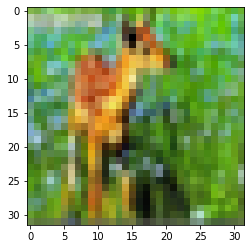

In [16]:
index = 1005
plt.imshow(X_train[index])
print(y_train[index])

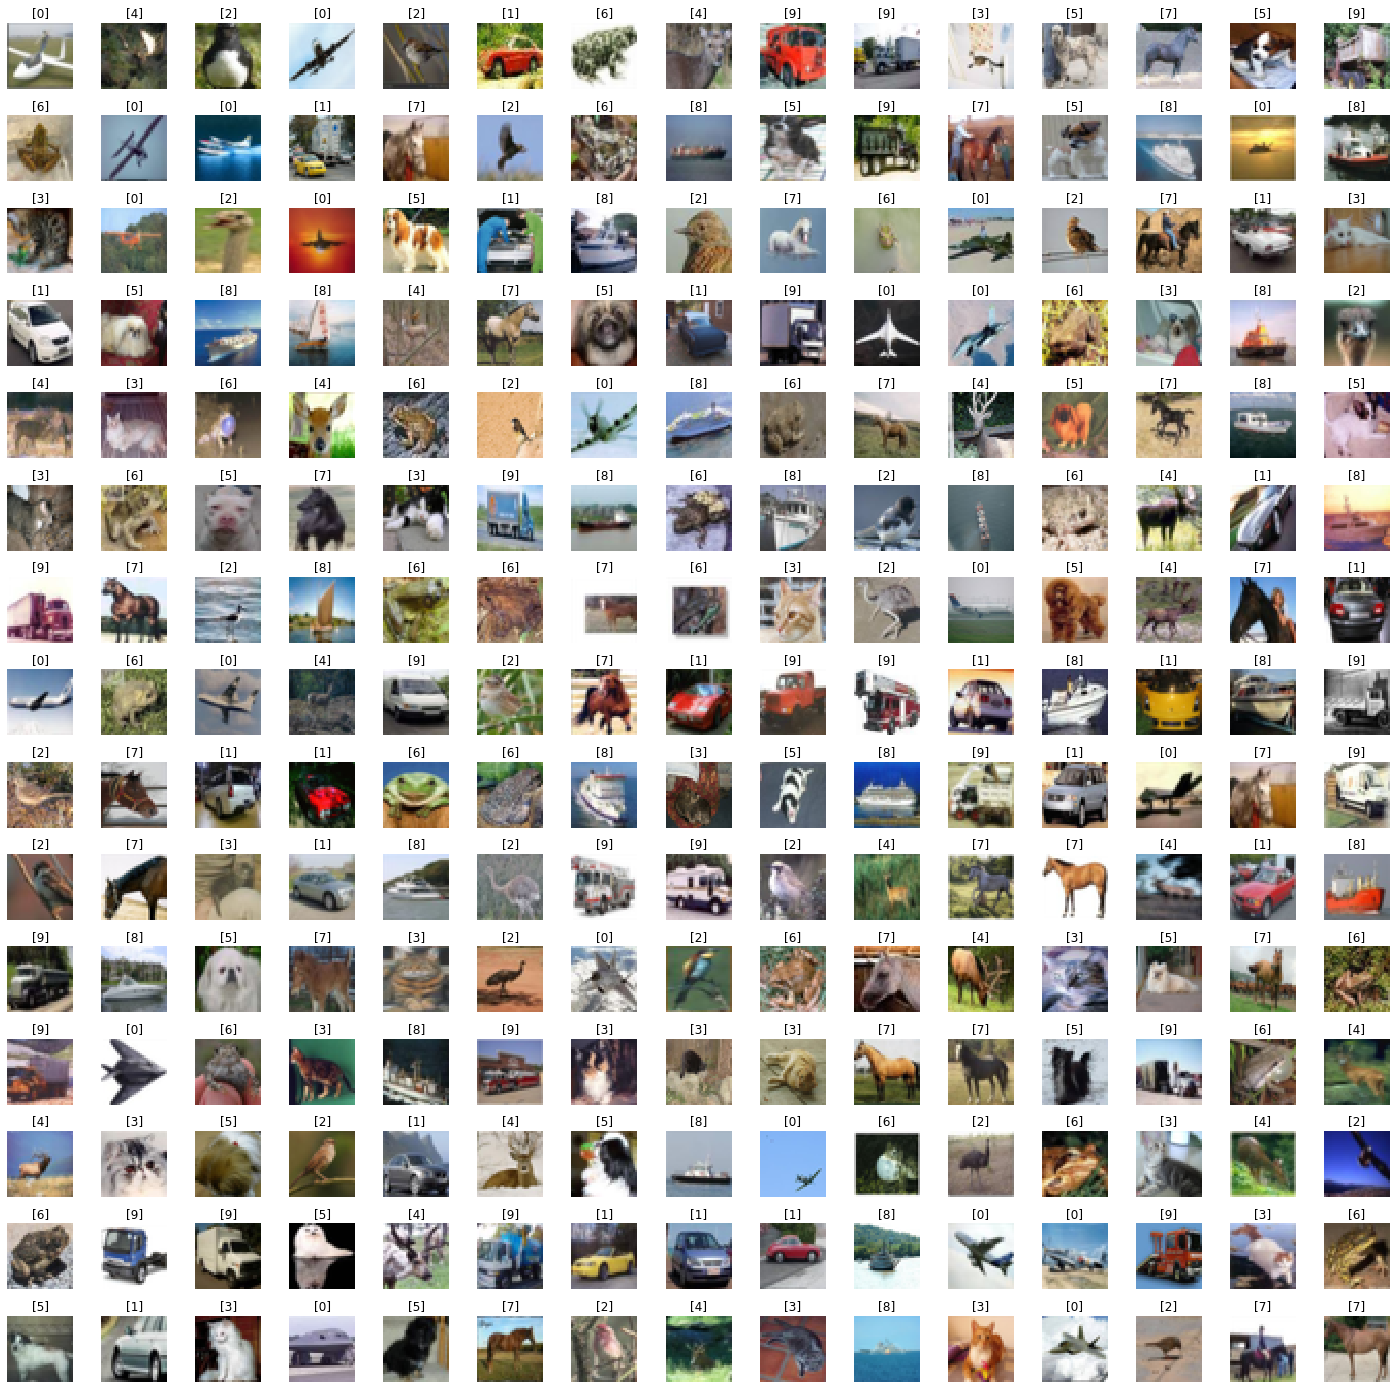

In [28]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid,W_grid,figsize=(25,25))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0,L_grid*W_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)

In [ ]:
### Step3-Data preparation